# Tata Steel Stock Price Prediction 

#### Import Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import warnings
warnings.filterwarnings("ignore")

#### Read the ataset

In [3]:
df = pd.read_csv("C:\\Users\\Harshal Raut\\OneDrive\\Desktop\\Machine Learning\\TATASTEEL.NS (1).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0
...,...,...,...,...,...,...,...
6866,2023-04-11,105.550003,107.849998,105.099998,107.550003,107.550003,49304956.0
6867,2023-04-12,108.199997,108.400002,106.949997,107.599998,107.599998,27349538.0
6868,2023-04-13,107.500000,108.150002,105.900002,107.500000,107.500000,34880922.0
6869,2023-04-17,107.599998,108.300003,106.750000,107.150002,107.150002,24642162.0


In [4]:
df.shape

(6871, 7)

## Data Exploration

#### Summarization the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6871 non-null   object 
 1   Open       6864 non-null   float64
 2   High       6864 non-null   float64
 3   Low        6864 non-null   float64
 4   Close      6864 non-null   float64
 5   Adj Close  6864 non-null   float64
 6   Volume     6864 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.9+ KB


#### Descriptive Summary of Data 

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6.864000e+03
mean,37.789490,38.398499,37.098333,37.718267,15.757361,6.982651e+07
std,29.604842,30.016965,29.104956,29.542239,19.703162,5.831510e+07
min,3.705570,3.910499,3.705570,3.775751,0.902283,0.000000e+00
25%,10.554558,10.702640,10.366472,10.504730,2.432781,3.292896e+07
50%,34.616764,35.114075,33.954185,34.530851,12.302627,5.383640e+07
75%,50.849415,51.657379,50.037729,50.813896,18.808940,8.758241e+07
max,161.486557,161.486557,161.486557,161.486557,123.550003,6.428460e+08


### Check if there were any duplicate values 

In [84]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [85]:
df.dropna(inplace = True )

In [86]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [ ]:
#FEATURE ENGINEERING

#### Split date into year , month and date  (FEATURE CONSTRUCTION)

In [7]:
df["Year"] = df["Date"].str[0:4]

In [8]:
df["date"] = df["Date"].str[8:10]

In [9]:
df["month_num"] = df["Date"].str[5:7]

In [10]:
df["Year"] = df["Year"].astype(int)  
df["date"] = df["date"].astype(int)
df["month_num"] = df["month_num"].astype(int)

In [11]:
df["Date"] = pd.to_datetime(df["Date"])      

## EDA

#### Opening vs Closing 

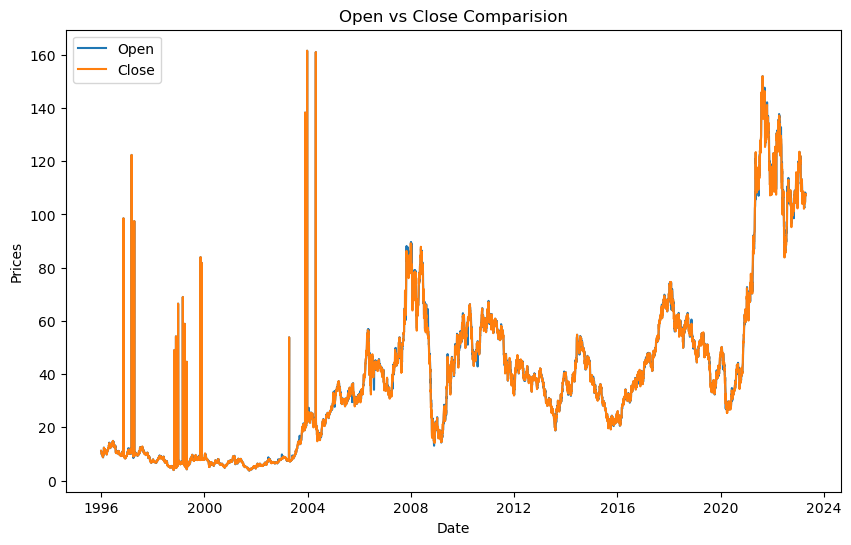

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Date"],y=df["Open"], label= "Open")
sns.lineplot(x=df["Date"], y=df["Close"], label = "Close")
plt.ylabel("Prices")
plt.title("Open vs Close Comparision")
plt.legend()

## Observations

#### Opening prices were mostly higher than closing

## Prices by date 

In [94]:
sorted_df = df.sort_values(by="date")

In [95]:
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,date,month_num
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0,1996,1,1
4702,2014-07-01,50.495041,51.952728,50.495041,51.509705,19.121082,55762230.0,2014,1,7
761,1998-12-01,4.803205,5.131653,4.794783,5.081122,1.166523,61206692.0,1998,1,12
2948,2007-06-01,47.279709,48.072193,47.096954,47.279709,14.531234,17940414.0,2007,1,6
6324,2021-02-01,60.490002,64.000000,59.744999,63.610001,27.656687,210846940.0,2021,1,2
...,...,...,...,...,...,...,...,...,...,...
4476,2013-07-31,19.826448,20.741076,19.278625,20.550529,7.628629,65774010.0,2013,31,7
4640,2014-03-31,36.647015,37.761715,36.489815,37.533058,13.932767,73888761.0,2014,31,3
6551,2021-12-31,110.500000,112.349998,110.264999,111.144997,49.405617,36870210.0,2021,31,12
5170,2016-05-31,30.916304,32.154861,30.511391,31.854750,12.419637,105401750.0,2016,31,5


Text(0.5, 1.0, 'Opening prices by date ')

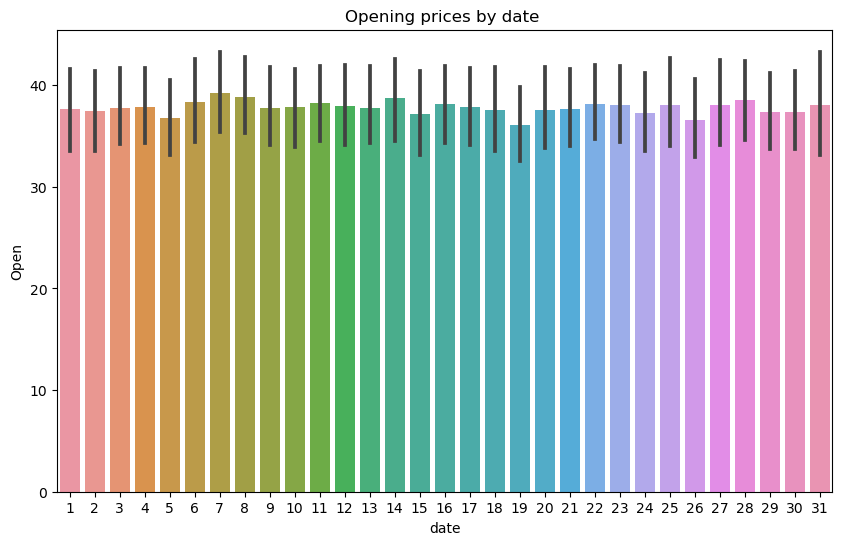

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_df["date"], y = sorted_df["Open"])
plt.title("Opening prices by date ")

## Open prices by month

In [97]:
sorted_df = df.sort_values(by= "month_num")

Text(0.5, 1.0, 'Opening Prices by Months')

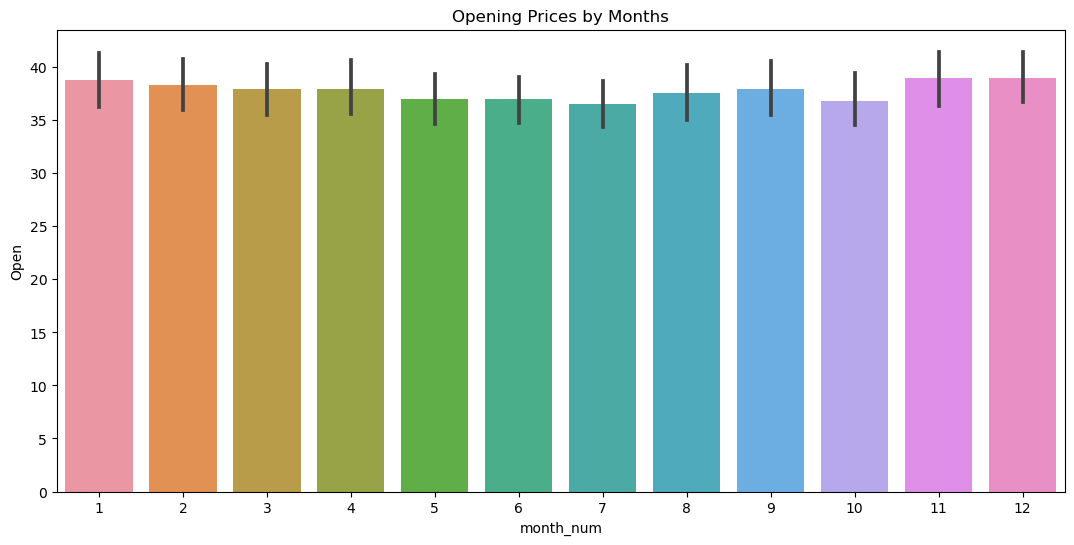

In [98]:
plt.figure(figsize= (13 , 6))
sns.barplot(x= sorted_df["month_num"] , y = sorted_df["Open"])
plt.title("Opening Prices by Months")

## Correlation  of features 

<Axes: >

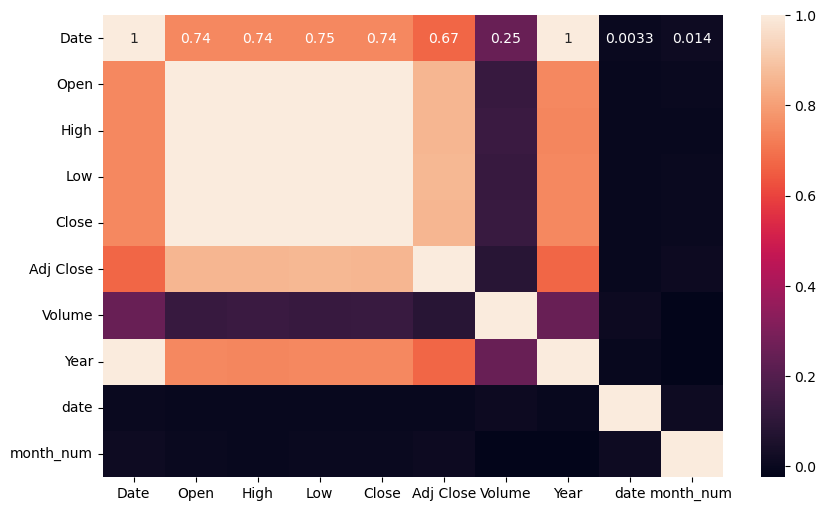

In [99]:
plt.figure(figsize = (10 ,6))
sns.heatmap(df.corr() , annot = True)

## Obervations

#### 1. High, low, close were vey simlilar to open. so we can drop them 
#### 2. As it will be difficult to predict Adj Close and also Volume by the user, it bettter to remove those also 
#### 3. As we cannot use Datetime directly in ml training, remove date also.

In [100]:
df.drop(["High","Low","Close","Adj Close" , "Volume" , "Date"], axis=1 , inplace=True)

In [101]:
df=df.sample(frac = 1)

In [102]:
df

,Open,Year,date,month_num
403,11.563063,1997,17,7
3514,47.636833,2009,16,9
3654,65.043327,2010,19,4
1705,8.056808,2002,15,7
5439,51.971783,2017,3,7
...,...,...,...,...
4426,29.282360,2013,22,5
2498,31.665783,2005,3,8
2840,34.244522,2006,20,12
1636,5.628536,2002,9,4


## Divide and Split data for model building

In [103]:
x=df.drop(["Open"], axis=1)     # axis=1: Operates along columns (horizontally).


In [104]:
y = df["Open"]

In [105]:
x

,Year,date,month_num
403,1997,17,7
3514,2009,16,9
3654,2010,19,4
1705,2002,15,7
5439,2017,3,7
...,...,...,...
4426,2013,22,5
2498,2005,3,8
2840,2006,20,12
1636,2002,9,4


In [ ]:
y

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 25 , random_state = 25)

## Import the models

In [108]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model 1 

In [109]:
model1 = AdaBoostRegressor()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test, y_pred)

0.7308910799693371

## Model 2

In [112]:
model2 =GradientBoostingRegressor()
model2.fit(x_train , y_train)
y_pred = model2.predict(x_test)
r2_score(y_test , y_pred)

0.9577857931391522

In [113]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error

In [114]:
mean_absolute_error(y_test , y_pred) 

3.6937415110808804

In [115]:
mean_absolute_percentage_error( y_test , y_pred)

0.16773648407161254

In [116]:
df.dtypes

Open         float64
Year           int32
date           int32
month_num      int32
dtype: object

## Conclusion

In [1]:
# This project effectively predicted Tata Steel's stock prices using historical data and machine learning models. 
# Through data exploration and feature engineering, we identified key trends that can help investors make informed decisions."